In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import spearmanr

In [2]:
train_data = pd.read_csv('../datasets/titanic_challenge/train.csv')
test_data = pd.read_csv('../datasets/titanic_challenge/test.csv')

| Variável | Definição | *obs |
| ----- | ----- | ----- |
| survival | Sobreviveu | 0 = Não, 1 = Sim |
| pclass | bilhete da classe | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sexo |
| Age | Idade em anos |
| sibsp | Nº de côjugues a bordo |
| parch | Nº de pais / filhos |
| ticket | Nº do ticket |
| fare | Tarifa |
| cabin | Nº da cabine |
| embarked | Porto de embarque | 	C = Cherbourg, Q = Queenstown, S = Southampton |

In [3]:
train_data.head()
print('Train data shape', train_data.shape)
print('Test data shape', test_data.shape)

Train data shape (891, 12)
Test data shape (418, 11)


In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median()) # Preenchendo as idades que estão como NaN com a mediana das idades

## Explorando os dados

In [8]:
women = train_data.loc[train_data.Sex  == 'female']['Survived']
men = train_data.loc[train_data.Sex  == 'male']['Survived']

rate_women = sum(women) / len(women)
rate_men = sum(men) / len(men)

In [9]:
print('% de mulheres que sobreviveram', rate_women * 100)
print('% de homens que sobreviveram', rate_men * 100)

% de mulheres que sobreviveram 74.20382165605095
% de homens que sobreviveram 18.890814558058924


In [10]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


In [11]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

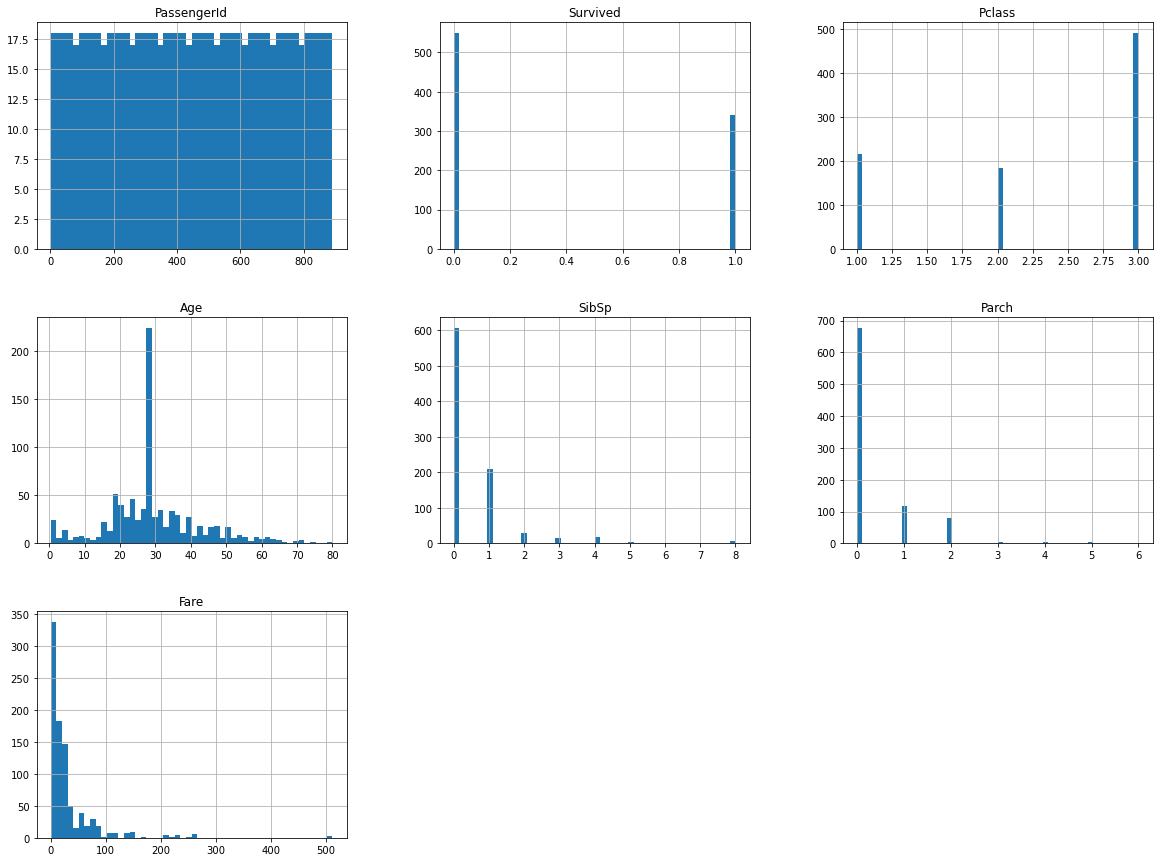

In [12]:
train_data.hist(bins=50, figsize=(20,15))

## Definição das features

In [13]:
# target
y = train_data['Survived']

# features relevantes
features = ['Pclass', 'Sex', 'Parch', 'SibSp', 'Fare']

# Convertendo a variável (Sex) categórica em variáveis fictícias/indicadoras.
X = pd.get_dummies(train_data[features])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)

## Seleção do modelo

In [16]:
model = tree.DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 5) # Árvore de decisão para classificar
# model_2 = tree.DecisionTreeClassifier(max_depth = 2, min_samples_leaf =  5)

In [17]:
model = model.fit(X_train, y_train)

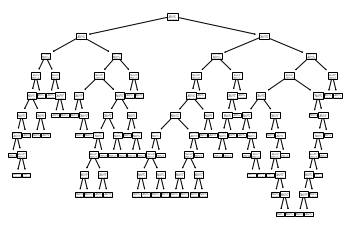

In [18]:
tree.plot_tree(model)
plt.show()

## Predições

In [19]:
train_predicted = model.predict(X_train)

In [20]:
print(classification_report(train_predicted, y_train))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       479
           1       0.75      0.85      0.79       233

    accuracy                           0.86       712
   macro avg       0.83      0.85      0.84       712
weighted avg       0.86      0.86      0.86       712



In [21]:
test_predicted = model.predict(X_test)

In [22]:
print(classification_report(test_predicted, y_test))

              precision    recall  f1-score   support

           0       0.93      0.79      0.86       117
           1       0.70      0.89      0.78        62

    accuracy                           0.83       179
   macro avg       0.81      0.84      0.82       179
weighted avg       0.85      0.83      0.83       179

